# 심화 과제 Without `torch.nn`
---

## 1) 과제 개요
- PyTorch의 `torch.nn`을 사용하지 않고, 다층 퍼셉트론(Multi-Layer Perceptron, MLP)을 구현하고 이후 `torch.nn`을 사용하여 구현한 MLP와 비교합니다.
- 3가지 이상 카테고리를 분류하는 Multi-class classification을 구현합니다.

## 2) 과제 진행 목적 및 배경
- `torch.nn`에는 모르고 사용하는 기능들이 많아 오용하는 경우를 줄이기 위함입니다.

## 3) 과제 수행으로 얻을 수 있는 역량
- MLP를 구현하는 과정을 통해 딥러닝 모델의 구조와 학습 방법을 이해합니다.
- `torch.nn`을 사용하지 않고 MLP를 구현하는 과정을 통해 PyTorch의 기능을 이해합니다.


## 4) 과제 핵심 내용
1. Iris 데이터 셋을 불러옵니다. [데이터셋 불러오기](#scrollTo=JMviOiQCTGzR)
2. `torch.nn` 없이 MLP 모델을 구현합니다. [모델 구현(Without `torch.nn`)](#scrollTo=ZUZiZOJVTGYb)
3. 모델을 학습합니다. [모델 학습(Without `torch.nn`)](#scrollTo=ZDJxT_xGTGYd)
4. `torch.nn`을 사용하여 MLP 모델을 구현합니다. [모델 구현(With `torch.nn`)](#scrollTo=pYqi8L12TGYe)
5. 모델을 학습합니다. [모델 학습](#scrollTo=ZDJxT_xGTGYd)
6. 두 모델을 비교합니다. [비교](#scrollTo=JRFd2onlTGYf)


## 5) 데이터 셋 개요 및 저작권 정보
>Iris 데이터셋은 꽃잎과 꽃받침의 길이와 너비를 이용하여 iris 꽃의 품종을 분류하는 데이터셋입니다. 총 3개의 class(*celss*, *versicolor*, *virginica*)로 구성되어 있으며, 각 class는 iris 꽃의 품종을 나타냅니다. iris 데이터셋은 다음과 같이 구성되어 있습니다.

- iris data: iris 꽃의 꽃잎과 꽃받침의 길이와 너비를 나타내는 feature입니다.
- iris target: iris 꽃의 품종을 나타내는 label입니다.
- UCI Machine Learning Repository: "Iris" Data Set - [Iris Data Set Description](https://archive.ics.uci.edu/ml/datasets/iris)

**License**
- This dataset is licensed under a [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode) (CC BY 4.0) license.

## 6) Required Packages
```python
sklearn >= 1.2.2
torch >= 2.2.1
matplotlib >= 3.7.1
numpy >= 1.25.2
pandas >= 2.0.3
```


---
## 과제 진행 방법

`[CODE START]`와 `[CODE END]` 사이의 코드들을 완성하는 것을 목표로 합니다.

- 🚨주의
    - 코드를 순차적으로 실행해주세요.

---

### 1. 데이터셋 불러오기

**❓문제**
> Iris 데이터 셋을 불러오고 이를 PyTorch의 Dataset 클래스를 상속받아 정의된 클래스로 변환합니다.
1. `__init__` 메소드에서 `self.X`와 `self.y`를 각각 iris 데이터와 iris target으로 초기화합니다.
2. `__len__` 메소드에서 데이터셋의 길이를 반환합니다.
3. `__getitem__` 메소드에서 index에 해당하는 데이터와 레이블을 반환합니다.

**Furthermore info**

코드 중 과제에 해당하지 않는 부분의 코드에 대한 정보는 다음과 같습니다.
- `sklearn.datasets.load_iris()`
    - iris 데이터셋을 불러오는 함수입니다.
    - [📚Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
- `sklearn.model_selection.train_test_split()`
    - 데이터셋을 train과 test로 나누는 함수입니다.
    - [📚Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch


class IrisDataset(Dataset):
    def __init__(self, mode="train", random_state=0):
        """
        mode: 데이터셋의 용도를 지정하는 문자열입니다. "train"이면 학습 데이터셋을, 그 외의 값이면 테스트 데이터셋을 로딩합니다.
        random_state: 데이터 분할 시 재현 가능성을 위해 난수 생성기에 사용되는 시드 값입니다.
        """
        iris = load_iris()
        train_X, test_X, train_y, test_y = train_test_split(
            iris.data,
            iris.target,
            stratify=iris.target,
            test_size=0.2,
            random_state=random_state,
        )
        if mode == "train":
            self.X = torch.FloatTensor(train_X)
            self.y = torch.LongTensor(train_y)

        else:
            self.X = torch.FloatTensor(test_X)
            self.y = torch.LongTensor(test_y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        return X, y

#### 1.1 데이터 셋 확인

위에서 완성한 코드를 실행하여 데이터 셋을 선언하고 확인합니다.

**❓문제**
1. `IrisDataset` 클래스를 불러옵니다.
2. `torch.utils.data.Dataloader`를 이용하여 데이터 로더를 선언합니다.

In [7]:
batch_size = 16

train_dataset = IrisDataset(mode="train")
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = IrisDataset(mode="test")
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
# 셈플 데이터 확인
X, y = next(iter(train_loader))

print("X feature 데이터 확인")
print(X)
print(X.shape)
print("y target 데이터 확인")
print(y)
print(y.shape)

# check shape
assert X.shape == (16, 4)
assert y.shape == (16,)

# check data type
assert X.dtype == torch.float32
assert y.dtype == torch.int64
print("✅테스트 통과!🥳")

X feature 데이터 확인
tensor([[6.4000, 3.1000, 5.5000, 1.8000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [5.3000, 3.7000, 1.5000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [6.3000, 3.3000, 4.7000, 1.6000]])
torch.Size([16, 4])
y target 데이터 확인
tensor([2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1])
torch.Size([16])
✅테스트 통과!🥳


### 2. 모델 구현(Without `torch.nn`)

#### 2.1.1 Define Linear layer

**❓문제**
1. `__init__` 메소드에서 `self.weight`와 `self.bias`를 초기화합니다.
2. `__call__` 메소드에서 입력값 `x`를 받아 선형 변환을 수행합니다.
3. `set_device` 메소드에서 연산을 수행할 `device`를 설정합니다.
4. `parameters` 메소드에서 `weight`와 `bias`를 반환합니다.


In [9]:
import math


# 선형 레이어를 정의합니다. 이 레이어는 입력 특성과 출력 특성의 수를 받아서 가중치와 편향을 초기화합니다.
class WithoutNNLinear:
    def __init__(self, in_features, out_features):
        self.weight = torch.randn(
            out_features, in_features
        )  # 가중치는 랜덤하게 초기화합니다.
        self.bias = torch.randn(out_features)  # 편향도 랜덤하게 초기화합니다.

    # 이 메소드는 입력 x를 받아서 가중치와 편향을 이용하여 출력을 계산합니다.
    def __call__(self, x):
        return (
            x @ self.weight.t() + self.bias
        )  # x와 가중치의 행렬 곱셈을 수행하고 편향을 더합니다.

    # 이 메소드는 모델을 특정 디바이스로 이동시킵니다.
    def set_device(self, device):
        self.weight = self.weight.to(device)
        self.bias = self.bias.to(device)

    # 이 메소드는 모델의 파라미터를 반환합니다.
    def parameters(self) -> list:
        """
        반환값:
            list: 모델의 가중치와 편향 텐서를 포함하는 리스트.
        """
        return [self.weight, self.bias]

#### 2.1.2 Linear layer debug

>의도한 대로 `WithoutNNLinear` 클래스가 작동하는지 확인합니다.

In [10]:
without_nn_linear = WithoutNNLinear(1, 3)

x = torch.FloatTensor([[1.0]])
print("변경 전 가중치와 편향 확인")
print(without_nn_linear.weight)
print(without_nn_linear.bias)

# 선형 레이어의 파라미터를 변경합니다.
without_nn_linear.weight = torch.FloatTensor([[1.0], [2.0], [3.0]])
without_nn_linear.bias = torch.FloatTensor([1.0, 1.0, 1.0])
print("변경된 가중치와 편향 확인")
print(without_nn_linear.weight)
print(without_nn_linear.bias)

out = without_nn_linear(x)
print("변경된 가중치와 편향을 통과한 출력 확인")
print(out)

assert out.shape == (1, 3)
assert torch.allclose(out, torch.FloatTensor([[2.0, 3.0, 4.0]]))
print("✅테스트 통과!🥳")

변경 전 가중치와 편향 확인
tensor([[-1.2691],
        [ 0.2521],
        [-0.3986]])
tensor([-1.2099, -1.0097, -0.0662])
변경된 가중치와 편향 확인
tensor([[1.],
        [2.],
        [3.]])
tensor([1., 1., 1.])
변경된 가중치와 편향을 통과한 출력 확인
tensor([[2., 3., 4.]])
✅테스트 통과!🥳


#### 2.1.3 Linear layer의 수학적 계산

선형 계층은 다음과 같은 수식으로 표현할 수 있습니다.

선형 계층의 파라미터 값은 다음과 같습니다.

- 가중치 행렬:
$$
W = \begin{bmatrix}
1.0 \\
2.0 \\
3.0 \\
\end{bmatrix}
$$

- 편향 벡터:
$$b = \begin{bmatrix} 1.0 & 1.0 & 1.0 \end{bmatrix}$$


- 입력 데이터:
$$
x = \begin{bmatrix}
1.0
\end{bmatrix}
$$



선형 계층의 연산은 아래와 같이 정의할 수 있습니다.

$$y = xW^T + b$$

1. 가중치 행렬을 전치합니다.
$$W^T = \begin{bmatrix} 1.0 & 2.0 & 3.0 \end{bmatrix}
$$

2. 입력 데이터와 가중치 행렬을 행렬곱합니다.
$$
xW^T = \begin{bmatrix}
1.0
\end{bmatrix} \begin{bmatrix}
1.0 & 2.0 & 3.0
\end{bmatrix}
$$

$$
xW^T = \begin{bmatrix}
1.0 * 1.0 & 1.0 * 2.0 & 1.0 * 3.0
\end{bmatrix}
$$

$$
xW^T = \begin{bmatrix}
1.0 & 2.0 & 3.0
\end{bmatrix}
$$

3. 편향 벡터를 더합니다.
$$
xW^T + b = \begin{bmatrix}
1.0 & 2.0 & 3.0
\end{bmatrix} + \begin{bmatrix}
1.0 & 1.0 & 1.0
\end{bmatrix}
$$

4. 최종 결과
$$
y = \begin{bmatrix}
2.0 & 3.0 & 4.0
\end{bmatrix}
$$


#### 2.2.1 Define ReLU layer

ReLU(Rectified Linear Unit)는 신경망, 특히 딥러닝에서 가장 많이 사용되는 활성화 함수 중 하나입니다. ReLU 함수는 다음과 같이 정의됩니다:

$$
\text{ReLU}(x) = \max(0, x)
$$

즉, 입력이 양수이면 입력 값을 그대로 출력하고, 그렇지 않으면 0을 출력합니다. 이를 다음과 같이 요약할 수 있습니다:

$$
\text{ReLU}(x) =
\begin{cases}
x & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}
$$

**❓문제**
1. `__call__` 메소드에서 입력값 `x`를 받아 ReLU 연산을 수행합니다.

In [11]:
# ReLU 활성화 함수를 정의합니다. 이 함수는 입력 x를 받아서 0보다 큰 값만 반환합니다.
class WithoutNNReLU:
    def __init__(self):
        pass

    def __call__(self, x):
        return x.clamp(min=0)  # x의 모든 원소에 대해 0보다 작은 값은 0으로 만듭니다.

#### 2.2.2 ReLU layer debug

의도한 대로 `WithoutNNReLU` 클래스가 작동하는지 그래프와 값을 비교하여 확인합니다.

ReLU 적용 전
tensor([-0.5000, -0.4000, -0.3000, -0.2000, -0.1000,  0.0000,  0.1000,  0.2000,
         0.3000,  0.4000,  0.5000])
ReLU 적용 후
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.2000, 0.3000,
        0.4000, 0.5000])


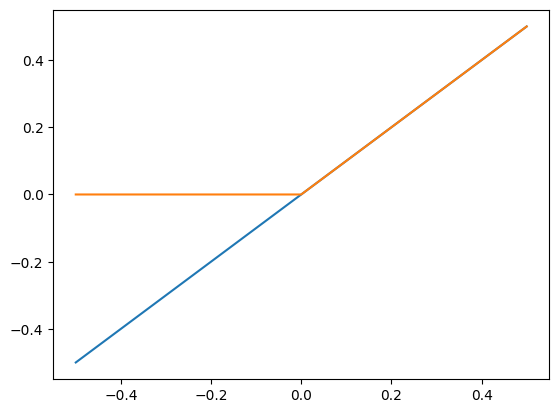

✅테스트 통과!🥳


In [12]:
without_relu = WithoutNNReLU()
x = torch.linspace(-0.5, 0.5, 11)
print("ReLU 적용 전")
print(x)
out = without_relu(x)
print("ReLU 적용 후")
print(out)

import matplotlib.pyplot as plt

plt.plot(x, x)
plt.plot(x, out)
plt.show()

assert torch.allclose(
    out, torch.FloatTensor([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
)
print("✅테스트 통과!🥳")

#### 2.3.1 Define MLP(Multi-Layer Perceptron)

위에서 만든 Linear layer와 ReLU layer를 이용하여 MLP를 구현합니다.

**❓문제**
1. `__init__` 메소드에서 `self.linear1`, `self.relu1`, `self.linear2`, `self.relu2`를 초기화합니다. (위에서 정의한 `WithoutNNLinear`과 `WithoutNNReLU` 클래스를 사용합니다.)
2. `__call__` 메소드에서 입력값 `x`를 받아 MLP 연산을 수행합니다.
3. `set_device` 메소드에서 연산을 수행할 `device`를 설정합니다.
4. `parameters` 메소드에서 `weight`와 `bias`를 반환합니다.


In [13]:
# MLP를 정의합니다. 이 모델은 선형 레이어와 ReLU 활성화 함수를 이용하여 구성됩니다.
class WithoutNNMLP:
    def __init__(self, in_features, hidden_features, out_features):
        self.linear1 = WithoutNNLinear(
            in_features, hidden_features
        )  # 첫 번째 선형 레이어
        self.relu = WithoutNNReLU()  # ReLU 활성화 함수
        self.linear2 = WithoutNNLinear(
            hidden_features, out_features
        )  # 두 번째 선형 레이어

    # 이 메소드는 입력 x를 받아서 모델을 통과시킨 후 출력을 반환합니다.
    def __call__(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

    # 이 메소드는 모델을 특정 디바이스로 이동시킵니다.
    def set_device(self, device):
        self.linear1.set_divce(device)
        self.linear2.set_divce(device)

    # 이 메소드는 모델의 파라미터를 반환합니다.
    def parameters(self) -> list:
        """
        반환값:
            list: 모델의 가중치와 편향 텐서를 포함하는 리스트.
        """
        return self.linear1.parameters() + self.linear2.parameters()

#### 2.4.1 Define CrossEntropyLoss

**❓문제**
- 아래 공식을 참고하여 Cross Entropy Loss를 구현합니다.

$$
\hat{y}_{i,c} = \text{softmax}(z_{i,c}) = \frac{e^{z_{i,c}}}{\sum_{j=1}^{C} e^{z_{i,j}}}
$$

- $z_i$는 클래스 $i$에 대한 입력 값 $logit$
- $\sum_{j=1}^{c} e^{z_j}$는 모든 클래스에 대한 입력 값의 지수의 합

$$
L = - \frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c})
$$

- $N$은 샘플의 수
- $C$는 클래스의 수

**💡Hints**
- ⚠️10강에서 학습한 Binary CrossEntropy loss 공식이 다르니 유의하세요.
- `torch.log_softmax`: softmax 함수를 적용한 후 log를 취합니다. [link](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html)
- `torch.softmax`: softmax 함수를 적용합니다. [link](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)

In [14]:
# Cross Entropy 손실 함수를 정의합니다. 이 함수는 출력과 타겟을 받아서 손실을 계산합니다.
class WithoutNNCrossEntropyLoss:
    def __init__(self, reduce="mean"):
        self.reduce = reduce

    # 이 메소드는 출력과 타겟을 받아서 손실을 계산합니다.
    def __call__(self, output, target):
        return -torch.log_softmax(output, dim=1)[range(target.size(0)), target].mean()

#### 2.4.2 CrossEntropyLoss debug
>의도한 대로 `WithoutNNCrossEntropyLoss` 클래스가 작동하는지 확인합니다.

In [15]:
ce_loss = WithoutNNCrossEntropyLoss()
output = torch.FloatTensor([[0.1, 0.2, 0.7], [0.2, 0.3, 0.5]])  # 모델의 출력
target = torch.LongTensor([2, 1])  # 타겟
loss = ce_loss(output, target)  # 손실 계산
print("Cross Entropy 손실 확인")
print(loss)

assert torch.allclose(loss, torch.FloatTensor([0.9539]), atol=1e-4)
print("✅테스트 통과!🥳")

Cross Entropy 손실 확인
tensor(0.9539)
✅테스트 통과!🥳


In [16]:
import torch.nn as nn
nn_ce_loss = nn.CrossEntropyLoss()
nn_loss = nn_ce_loss(output, target)
print("Cross Entropy 손실 확인")
print(nn_loss)

Cross Entropy 손실 확인
tensor(0.9539)


### 3. 모델 학습(Without `torch.nn`)

**❓문제**
1. 학습, 테스트 데이터 셋과 데이터 로더를 선언합니다.
2. `train` 함수를 이용하여 모델을 학습하고 학습 loss를 반환합니다.
3. `test` 함수를 이용하여 모델을 평가하고 평가 loss와 accuracy를 반환합니다.

In [17]:
# 학습 데이터셋과 데이터 로더를 정의합니다.
batch_size = 16
train_dataset = IrisDataset(mode="train")
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 테스트 데이터셋과 데이터 로더를 정의합니다.
test_dataset = IrisDataset(mode="test")
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# 학습 함수를 정의합니다. 이 함수는 모델, 손실 함수, 옵티마이저, 데이터 로더를 받아서 학습을 수행합니다.
def train(model, criterion, optimizer, train_loader) -> float:

    # 모델을 학습할 수 있도록 model의 미분 가능하게 설정합니다.
    for param in model.parameters():
        param.requires_grad = True

    running_loss = 0
    for X, y in train_loader:
        optimizer.zero_grad()  # 그래디언트를 초기화합니다.
        output = model(X)  # 모델의 출력을 계산합니다.
        loss = criterion(output, y)  # loss을 계산합니다.
        loss.backward()  # 그래디언트를 계산합니다.
        optimizer.step()  # 파라미터를 업데이트합니다.
        running_loss += loss.item()  # loss을 누적합니다.
    return running_loss / len(train_loader)  # 평균 loss을 반환합니다.


def test(model, test_loader, criterion) -> tuple[float, float]:

    running_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():# 그래디언트를 계산하지 않게 설정합니다.
        for X, y in test_loader:
            output = model(X)  # 모델의 출력을 계산합니다.
            loss = criterion(output, y)  # loss을 계산합니다.
            running_loss += loss.item()  # loss을 누적합니다.
            _, predicted = output.max(1) # 가장 큰 값의 인덱스를 예측값으로 사용합니다.
            correct += (predicted == y).sum().item() # 정답을 카운트합니다.
            total += y.size(0) # 전체 개수를 카운트합니다.
    return running_loss / len(test_loader), correct / total  # 평균 loss과 정확도를 반환합니다.


def main():
    # 모델, 손실 함수, 옵티마이저를 정의합니다.
    model = WithoutNNMLP(4, 100, 3)
    criterion = WithoutNNCrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    train_loss_list, test_loss_list, test_acc_list = [], [], []
    for epoch in range(50):
        train_loss = train(model, criterion, optimizer, train_loader)
        train_loss_list.append(train_loss)
        test_loss, test_acc = test(model, test_loader, criterion)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)
        print(
            f"Epoch: {epoch + 1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}"
        )

    plt.plot(train_loss_list, label="train loss")
    plt.plot(test_loss_list, label="test loss")
    plt.legend()
    plt.show()

    plt.plot(test_acc_list, label="test acc")
    plt.legend()
    plt.show()

    return train_loss_list, test_loss_list, test_acc_list

TypeError: 'type' object is not subscriptable

#### 3.1.1 Train MLP

위에서 완성한 코드를 실행하여 MLP 모델을 학습합니다.

**❓문제**
- 위에서 정의한 `train`함수와 `test`함수가 정상적으로 작동하는지 확인합니다.
- 학습이 진행됨에 따라 loss가 감소하고 정확도가 증가하는지 직접 확인합니다.

Epoch: 1, Train Loss: 7.7443, Test Loss: 0.8186, Test Acc: 0.7333
Epoch: 2, Train Loss: 1.8308, Test Loss: 12.8408, Test Acc: 0.3667
Epoch: 3, Train Loss: 2.9879, Test Loss: 0.8166, Test Acc: 0.8000
Epoch: 4, Train Loss: 2.0300, Test Loss: 0.0458, Test Acc: 1.0000
Epoch: 5, Train Loss: 0.1185, Test Loss: 0.4354, Test Acc: 0.9000
Epoch: 6, Train Loss: 0.1603, Test Loss: 0.1494, Test Acc: 0.9333
Epoch: 7, Train Loss: 0.6769, Test Loss: 0.7359, Test Acc: 0.7333
Epoch: 8, Train Loss: 1.1993, Test Loss: 7.9506, Test Acc: 0.6000
Epoch: 9, Train Loss: 1.7684, Test Loss: 0.5903, Test Acc: 0.7667
Epoch: 10, Train Loss: 0.4223, Test Loss: 2.8469, Test Acc: 0.6667
Epoch: 11, Train Loss: 1.2770, Test Loss: 0.7735, Test Acc: 0.8333
Epoch: 12, Train Loss: 0.1772, Test Loss: 0.0660, Test Acc: 0.9333
Epoch: 13, Train Loss: 2.6125, Test Loss: 0.1333, Test Acc: 0.9333
Epoch: 14, Train Loss: 0.8701, Test Loss: 0.0490, Test Acc: 0.9667
Epoch: 15, Train Loss: 0.4213, Test Loss: 0.1061, Test Acc: 0.9333
Epo

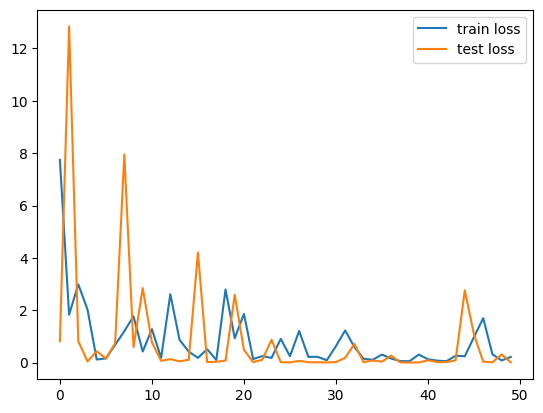

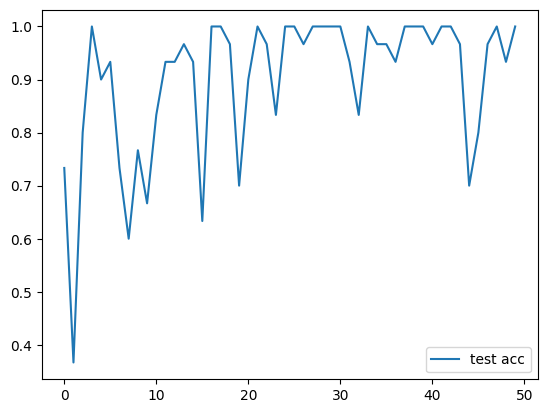

In [ ]:
train_loss_list, test_loss_list, test_acc_list = main()

### 4. 모델 구현(With `torch.nn`)




#### 4.1 MLP components 선언

>사용할 함수들을 각각 확인합니다.

**❓문제**
- 위에서 정의한 모델을 `torch.nn`을 이용하여 구현합니다.

**💡Hints**
- `torch.nn.Linear`: Linear layer를 정의합니다. [link](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- `torch.nn.ReLU`: ReLU layer를 정의합니다. [link](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
- `torch.nn.CrossEntropyLoss`: Cross Entropy Loss를 정의합니다. [link](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

#### 4.1.1 Linear layer 선언

**❓문제**
- input data의 ***input size는 1***, output data의 ***output size는 3***인 Linear layer를 정의합니다.

In [ ]:
import torch.nn as nn

nn_linear = nn.Linear(1, 3)

In [ ]:
x = torch.FloatTensor([[1.0]])

print("변경 전 가중치와 편향 확인")
print(nn_linear.weight)
print(nn_linear.bias)

nn_linear.weight = nn.Parameter(torch.FloatTensor([[1.0], [2.0], [3.0]]))
nn_linear.bias = nn.Parameter(torch.FloatTensor([1.0, 1.0, 1.0]))
print("변경된 가중치와 편향 확인")
print(nn_linear.weight)
print(nn_linear.bias)

out = nn_linear(x)
print("변경된 가중치와 편향을 통과한 출력 확인")
print(out)

assert torch.allclose(out, torch.FloatTensor([[2.0, 3.0, 4.0]]))
print("✅테스트 통과!🥳")

변경 전 가중치와 편향 확인
Parameter containing:
tensor([[ 0.9436],
        [-0.6645],
        [ 0.8021]], requires_grad=True)
Parameter containing:
tensor([-0.0472, -0.6961, -0.3731], requires_grad=True)
변경된 가중치와 편향 확인
Parameter containing:
tensor([[1.],
        [2.],
        [3.]], requires_grad=True)
Parameter containing:
tensor([1., 1., 1.], requires_grad=True)
변경된 가중치와 편향을 통과한 출력 확인
tensor([[2., 3., 4.]], grad_fn=<AddmmBackward0>)
✅테스트 통과!🥳


#### 4.2 ReLU 선언

**❓문제**
- ReLU activation function을 정의합니다.

In [ ]:
nn_relu = nn.ReLU()

#### 4.2.2 ReLU debug

ReLU 적용 전
tensor([-5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -7.4506e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01])
ReLU 적용 후
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.2000, 0.3000,
        0.4000, 0.5000])


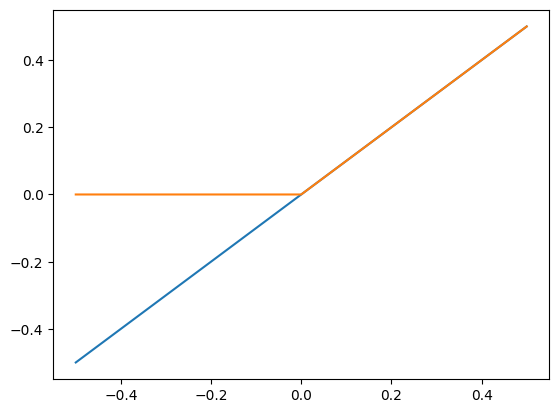

✅테스트 통과!🥳


In [ ]:
x = torch.linspace(-0.5, 0.5, 11)

print("ReLU 적용 전")
print(x)
out = nn_relu(x)
print("ReLU 적용 후")
print(out)

plt.plot(x, x)
plt.plot(x, out)
plt.show()

assert torch.allclose(
    out, torch.FloatTensor([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
)
print("✅테스트 통과!🥳")

#### 4.3 Combine components

**❓문제**
1. `__init__` 메소드에서 부모 클래스 생성자를 호출합니다.
2. `__init__` 메소드에서 `self.linear1`, `self.relu1`, `self.linear2`, `self.relu2`를 초기화합니다.
3. `forward` 메소드에서 MLP 연산을 수행합니다.


위에서 정의한 함수들을 이용하여 모델을 구성합니다.

In [ ]:
import torch.nn as nn


class MLP(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(in_features, hidden_features)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

### 5. 모델 학습

**❓문제**
1. `train_nn` 함수를 이용하여 모델을 학습하고 학습 loss를 반환합니다.
2. `test_nn` 함수를 이용하여 모델을 평가하고 평가 loss와 accuracy를 반환합니다.


In [ ]:
# 신경망을 학습하는 함수
def train_nn(model, criterion, optimizer, train_loader) -> float:
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0
    for X, y in train_loader:  # 학습 데이터를 반복
        optimizer.zero_grad()  # 그래디언트를 0으로 초기화
        output = model(X)  # 모델의 출력을 계산
        loss = criterion(output, y)  # 손실을 계산
        loss.backward()  # 역전파를 수행
        optimizer.step()  # 가중치를 업데이트
        running_loss += loss.item()  # 손실을 누적
    return running_loss / len(train_loader)  # 평균 손실을 반환


# 신경망을 테스트하는 함수
def test_nn(model, test_loader, criterion) -> tuple[float, float]:
    model.eval()  # 모델을 평가 모드로 설정
    running_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():  # 그래디언트 계산을 비활성화
        for X, y in test_loader:  # 테스트 데이터를 반복
            output = model(X)  # 모델의 출력을 계산
            loss = criterion(output, y)  # 손실을 계산
            running_loss += loss.item()  # 손실을 누적
            _, predicted = output.max(1)  # 가장 높은 확률을 가진 클래스를 예측
            correct += (predicted == y).sum().item()  # 정확한 예측의 수를 누적
            total += y.size(0)  # 전체 레이블의 수를 누적
    return running_loss / len(test_loader), correct / total  # 평균 손실과 정확도를 반환


# 신경망을 학습하고 테스트하는 메인 함수
def main_nn():
    model = MLP(4, 100, 3)  # 모델을 생성
    criterion = nn.CrossEntropyLoss()  # 손실 함수를 정의
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 최적화 알고리즘을 정의

    train_loss_list, test_loss_list, test_acc_list = (
        [],
        [],
        [],
    )  # 손실과 정확도를 저장할 리스트
    for epoch in range(50):  # 50 에포크 동안 학습
        train_loss = train_nn(
            model, criterion, optimizer, train_loader
        )  # 학습 손실을 계산
        train_loss_list.append(train_loss)  # 학습 손실을 저장
        test_loss, test_acc = test_nn(
            model, test_loader, criterion
        )  # 테스트 손실과 정확도를 계산
        test_loss_list.append(test_loss)  # 테스트 손실을 저장
        test_acc_list.append(test_acc)  # 테스트 정확도를 저장
        print(
            f"Epoch: {epoch + 1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}"
        )  # 에포크, 학습 손실, 테스트 손실, 테스트 정확도를 출력

    # 학습 손실과 테스트 손실을 그래프로 그림
    plt.plot(train_loss_list, label="train loss")
    plt.plot(test_loss_list, label="test loss")
    plt.legend()
    plt.show()

    # 테스트 정확도를 그래프로 그림
    plt.plot(test_acc_list, label="test acc")
    plt.legend()
    plt.show()

    return train_loss_list, test_loss_list, test_acc_list

Epoch: 1, Train Loss: 0.9669, Test Loss: 1.0201, Test Acc: 0.4000
Epoch: 2, Train Loss: 0.9437, Test Loss: 0.7764, Test Acc: 0.9667
Epoch: 3, Train Loss: 0.7770, Test Loss: 0.6805, Test Acc: 0.6667
Epoch: 4, Train Loss: 0.7012, Test Loss: 0.6541, Test Acc: 0.6667
Epoch: 5, Train Loss: 0.7016, Test Loss: 0.8287, Test Acc: 0.6667
Epoch: 6, Train Loss: 0.6690, Test Loss: 0.5680, Test Acc: 0.7000
Epoch: 7, Train Loss: 0.6268, Test Loss: 0.5231, Test Acc: 0.8000
Epoch: 8, Train Loss: 0.5330, Test Loss: 0.5004, Test Acc: 0.9000
Epoch: 9, Train Loss: 0.5848, Test Loss: 0.4820, Test Acc: 0.9000
Epoch: 10, Train Loss: 0.5170, Test Loss: 0.6367, Test Acc: 0.6667
Epoch: 11, Train Loss: 0.5237, Test Loss: 0.4462, Test Acc: 1.0000
Epoch: 12, Train Loss: 0.5047, Test Loss: 0.4367, Test Acc: 0.8000
Epoch: 13, Train Loss: 0.4651, Test Loss: 0.4621, Test Acc: 0.6667
Epoch: 14, Train Loss: 0.4753, Test Loss: 0.5252, Test Acc: 0.6667
Epoch: 15, Train Loss: 0.5096, Test Loss: 0.5673, Test Acc: 0.6667
Epoc

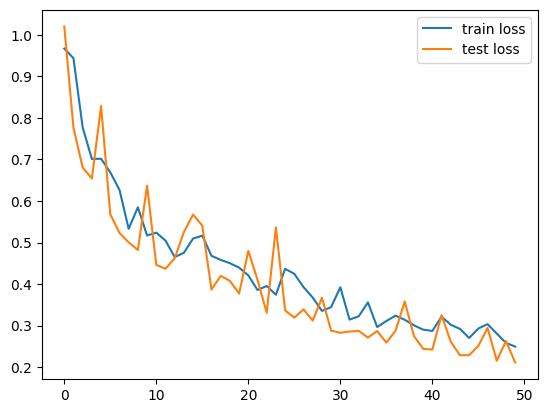

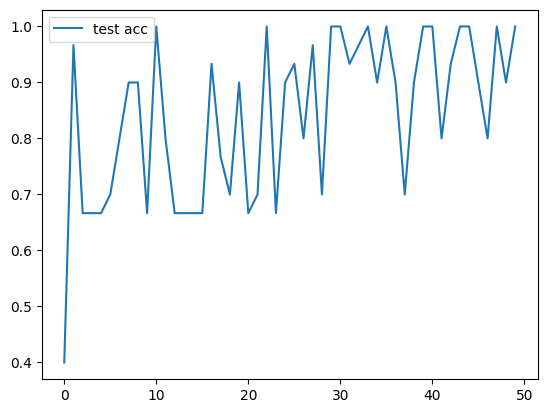

In [ ]:
nn_train_loss_list, nn_test_loss_list, nn_test_acc_list = main_nn()

### 6. 비교

`torch.nn`을 이용하여 구현한 모델과 `torch.nn`을 이용하지 않고 구현한 모델을 비교 해봅시다.

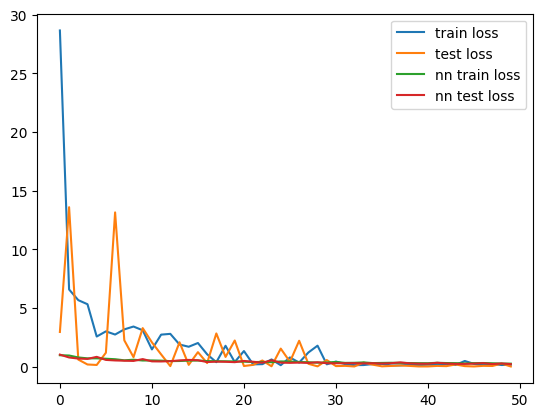

In [ ]:
plt.plot(train_loss_list, label="train loss")
plt.plot(test_loss_list, label="test loss")
plt.plot(nn_train_loss_list, label="nn train loss")
plt.plot(nn_test_loss_list, label="nn test loss")
plt.legend()
plt.show()

학습 초기에 두 모델을 비교하면 loss 값이 다르게 나타나는 것을 확인 할 수 있습니다. 이에 대한 이유를 생각해보고 이를 해결하기 위한 방법을 찾아보세요.

#### [Hint]

- [`torch.nn.Linear`](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear)의 소스코드를 확인해보세요.

In [ ]:
import math


# 선형 레이어를 정의합니다. 이 레이어는 입력 특성과 출력 특성의 수를 받아서 가중치와 편향을 초기화합니다.
class WithoutNNLinear:
    def __init__(self, in_features, out_features):
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.randn(
            self.out_features, self.in_features
        )  # 가중치는 랜덤하게 초기화합니다.
        self.bias = torch.randn(self.out_features)  # 편향도 랜덤하게 초기화합니다.

        self.reset_parameters()

    def reset_parameters(self):
        bound = 1 / math.sqrt(self.in_features)
        self.weight = torch.FloatTensor(self.out_features, self.in_features).uniform_(
            -bound, bound
        )
        self.bias = torch.FloatTensor(self.out_features).uniform_(-bound, bound)

    # 이 메소드는 입력 x를 받아서 가중치와 편향을 이용하여 출력을 계산합니다.
    def __call__(self, x):
        return (
            x @ self.weight.t() + self.bias
        )  # x와 가중치의 행렬 곱셈을 수행하고 편향을 더합니다.

    # 이 메소드는 모델을 특정 디바이스로 이동시킵니다.
    def set_divce(self, device):
        self.weight = self.weight.to(device)
        self.bias = self.bias.to(device)

    # 이 메소드는 모델의 파라미터를 반환합니다.
    def parameters(self):
        return [self.weight, self.bias]

#### 재학습
> init method를 사용하는 MLP 재학습 진행 후 학습 log를 비교합니다.

Epoch: 1, Train Loss: 1.0386, Test Loss: 1.0078, Test Acc: 0.3333
Epoch: 2, Train Loss: 0.8862, Test Loss: 0.7779, Test Acc: 0.6667
Epoch: 3, Train Loss: 0.8284, Test Loss: 0.7536, Test Acc: 0.6667
Epoch: 4, Train Loss: 0.6773, Test Loss: 0.8460, Test Acc: 0.6667
Epoch: 5, Train Loss: 0.6627, Test Loss: 0.5879, Test Acc: 0.6667
Epoch: 6, Train Loss: 0.6215, Test Loss: 0.6818, Test Acc: 0.6667
Epoch: 7, Train Loss: 0.6331, Test Loss: 0.5510, Test Acc: 0.6667
Epoch: 8, Train Loss: 0.5695, Test Loss: 0.5145, Test Acc: 0.6667
Epoch: 9, Train Loss: 0.5243, Test Loss: 0.4860, Test Acc: 0.9000
Epoch: 10, Train Loss: 0.5667, Test Loss: 0.4953, Test Acc: 0.6667
Epoch: 11, Train Loss: 0.4593, Test Loss: 0.6433, Test Acc: 0.6667
Epoch: 12, Train Loss: 0.4804, Test Loss: 0.4971, Test Acc: 0.6667
Epoch: 13, Train Loss: 0.4769, Test Loss: 0.5241, Test Acc: 0.6667
Epoch: 14, Train Loss: 0.4803, Test Loss: 0.4576, Test Acc: 0.7000
Epoch: 15, Train Loss: 0.4715, Test Loss: 0.5490, Test Acc: 0.6667
Epoc

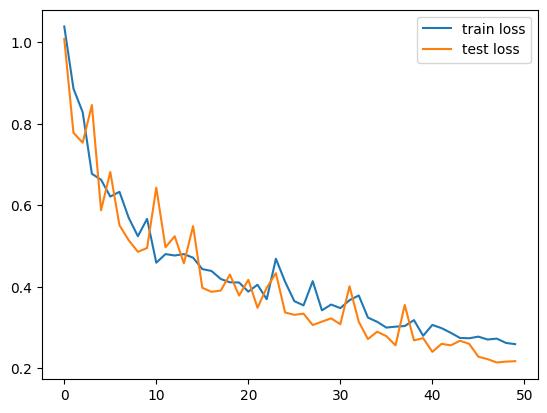

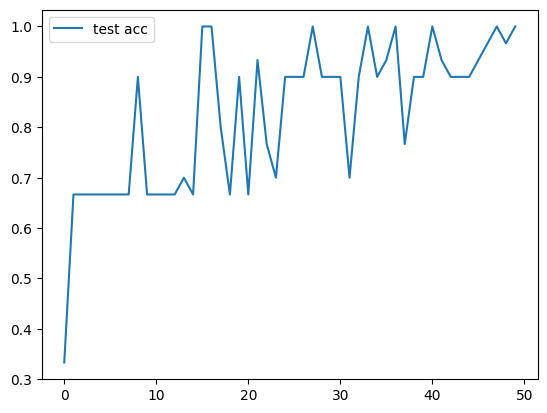

In [ ]:
train_loss_list, test_loss_list, test_acc_list = main()

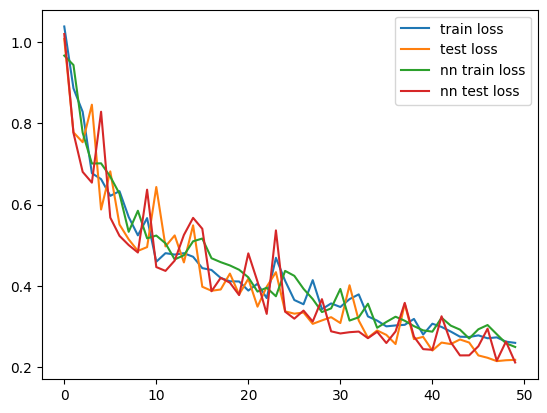

In [ ]:
plt.plot(train_loss_list, label="train loss")
plt.plot(test_loss_list, label="test loss")
plt.plot(nn_train_loss_list, label="nn train loss")
plt.plot(nn_test_loss_list, label="nn test loss")
plt.legend()
plt.show()

## 콘텐츠 라이선스

<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7">

<font color='red'><b>WARNING</font> : 본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다. 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다. </b>